In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  


In [2]:
cols = ['target', 'ids', 'date', 'flag', 'user', 'text']

data = pd.read_csv("/home/rayan/Downloads/archive/training-noemoticon.csv", encoding='latin-1', names=cols,index_col=['ids'])
data.head()


,target,date,flag,user,text
ids,,,,,
1467810369,0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1467810672,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1467810917,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
1467811184,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
1467811193,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
print("the data has {} rows and {} columns".format(data.shape[0],data.shape[1]))

the data has 1600000 rows and 5 columns


In [4]:
data.columns 

Index(['target', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600000 entries, 1467810369 to 2193602129
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   date    1600000 non-null  object
 2   flag    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB


In [6]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

/tmp/ipykernel_10049/2536266494.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['date']=pd.to_datetime(data['date'],errors='coerce')


In [7]:
data.isnull().sum()

target    0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(188)

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(1599812, 5)

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
for neg in ['no', 'nor', 'not', "don't", "didn't", "won't", "isn't", "aren't", "haven't", "hasn't"]:
    stop_words.discard(neg)

lemmatizer = WordNetLemmatizer()

URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')
MENTION_PATTERN = re.compile(r'@\w+')
HASHTAG_PATTERN = re.compile(r'#')  # we will remove only the '#'
DIGIT_PATTERN = re.compile(r'\d+')
MULTISPACE = re.compile(r'\s+')

PUNCT_TABLE = str.maketrans('', '', string.punctuation)

def clean_tweet_improved(text):
    if not isinstance(text, str):
        return ""
    text = text.strip()
    text = text.lower()
    text = URL_PATTERN.sub('', text)
    text = MENTION_PATTERN.sub('', text)
    text = HASHTAG_PATTERN.sub('', text)

    text = text.translate(PUNCT_TABLE)
    text = DIGIT_PATTERN.sub('', text)
    text = MULTISPACE.sub(' ', text).strip()
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w and w not in stop_words]
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /home/rayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rayan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rayan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
data['clean_text'] = data['text'].apply(clean_tweet_improved)
data[['text', 'clean_text']].head()

,text,clean_text
ids,,
1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1467810672,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1467810917,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
1467811184,my whole body feels itchy and like its on fire,whole body feel itchy like fire
1467811193,"@nationwideclass no, it's not behaving at all....",no not behaving im mad cant see


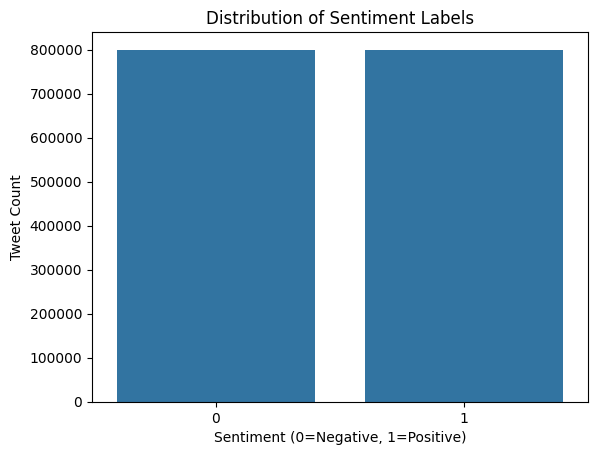

target
0    799915
1    799897
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment labels in Sentiment140: 0 = negative, 4 = positive
data['target'] = data['target'].replace(4, 1)# Convert 4 to 1 for positive sentiment

sns.countplot(x='target', data=data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Tweet Count')
plt.show()

print(data['target'].value_counts())


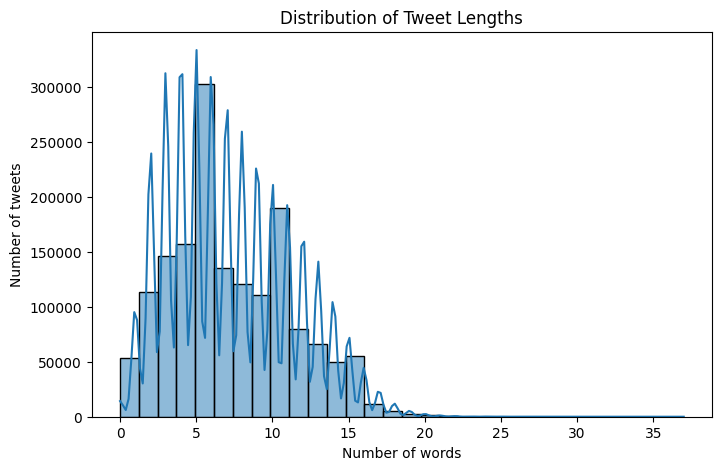

In [ ]:
#See if tweets are short or long
data['tweet_length'] = data['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of words")
plt.ylabel("Number of tweets")
plt.show()


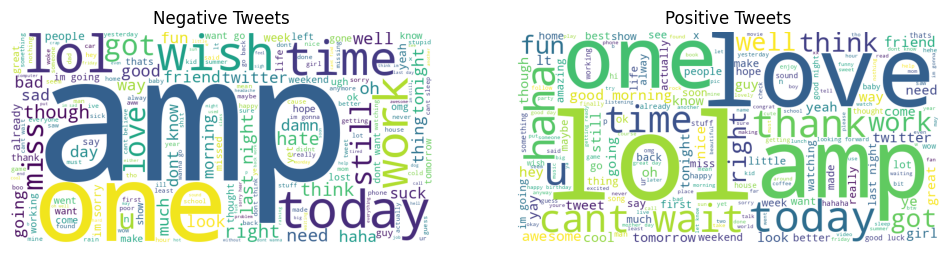

In [16]:
from wordcloud import WordCloud
# Generate word clouds for positive and negative tweets
neg_text = " ".join(data[data['target']==0]['clean_text'])
pos_text = " ".join(data[data['target']==1]['clean_text'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(neg_text))
plt.axis('off')
plt.title('Negative Tweets')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text))
plt.axis('off')
plt.title('Positive Tweets')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

X = data['clean_text']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#convert text to numerical features
cv = CountVectorizer(max_features=5000)  # limit to top 5000 words
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [20]:
print("CountVectorizer shape:", X_train_cv.shape)
print("TF-IDF shape:", X_train_tfidf.shape)


CountVectorizer shape: (1279849, 5000)
TF-IDF shape: (1279849, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7617974578310617
              precision    recall  f1-score   support

           0       0.76      0.77      0.76    159377
           1       0.77      0.75      0.76    160586

    accuracy                           0.76    319963
   macro avg       0.76      0.76      0.76    319963
weighted avg       0.76      0.76      0.76    319963



In [22]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7818091466825852
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159377
           1       0.77      0.80      0.79    160586

    accuracy                           0.78    319963
   macro avg       0.78      0.78      0.78    319963
weighted avg       0.78      0.78      0.78    319963



In [23]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7809027918853118
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159377
           1       0.77      0.80      0.79    160586

    accuracy                           0.78    319963
   macro avg       0.78      0.78      0.78    319963
weighted avg       0.78      0.78      0.78    319963



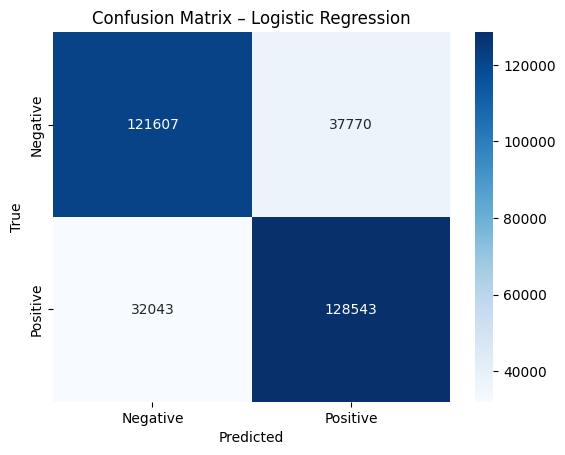

In [24]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


I love the new design of this app! --> Positive 😊
Worst update ever, everything is broken. --> Negative 😠
It’s okay, not great but not bad either. --> Negative 😠


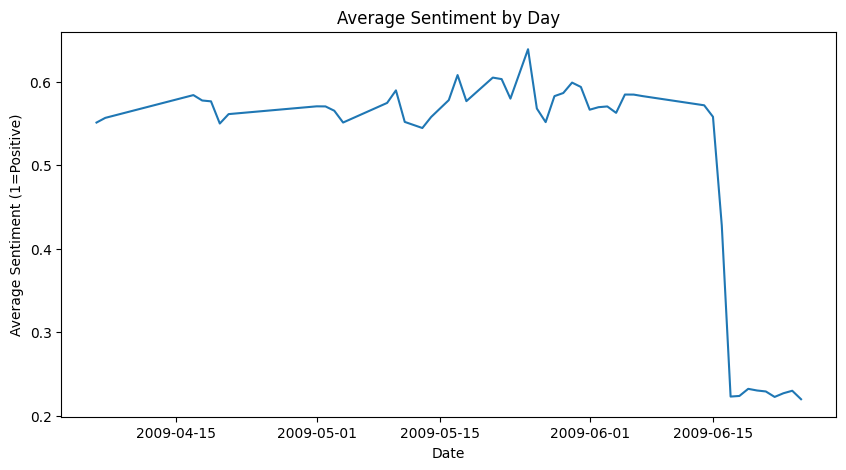

In [ ]:
new_tweets = [
    "I love the new design of this app!",
    "Worst update ever, everything is broken.",
    "It’s okay, not great but not bad either."
]

new_clean = [clean_tweet_improved(t) for t in new_tweets]

new_features = tfidf.transform(new_clean)


preds = lr.predict(new_features)

for tweet, sentiment in zip(new_tweets, preds):
    label = "Positive 😊" if sentiment == 1 else "Negative 😠"
    print(f"{tweet} --> {label}")
data['predicted_sentiment'] = lr.predict(tfidf.transform(data['clean_text']))
daily_sentiment = data.groupby(data['date'].dt.date)['predicted_sentiment'].mean()

daily_sentiment.plot(figsize=(10,5))
plt.title("Average Sentiment by Day")
plt.xlabel("Date")
plt.ylabel("Average Sentiment (1=Positive)")
plt.show()


In [ ]:
sns.set(style="whitegrid")

if 'predicted_sentiment' not in data.columns:
    try:
        X_all = tfidf.transform(data['clean_text'].astype(str))
        data['predicted_sentiment'] = lr.predict(X_all)
        if hasattr(lr, "predict_proba"):
            probs = lr.predict_proba(X_all)
            data['pred_prob_pos'] = probs[:, 1]
        else:
            if hasattr(lr, "decision_function"):
                scores = lr.decision_function(X_all)
                data['pred_prob_pos'] = (scores - scores.min()) / (scores.max() - scores.min())
            else:
                data['pred_prob_pos'] = np.nan
    except Exception as e:
        print("Prediction step skipped — model/vectorizer not available in this session.")
        print("Error:", e)


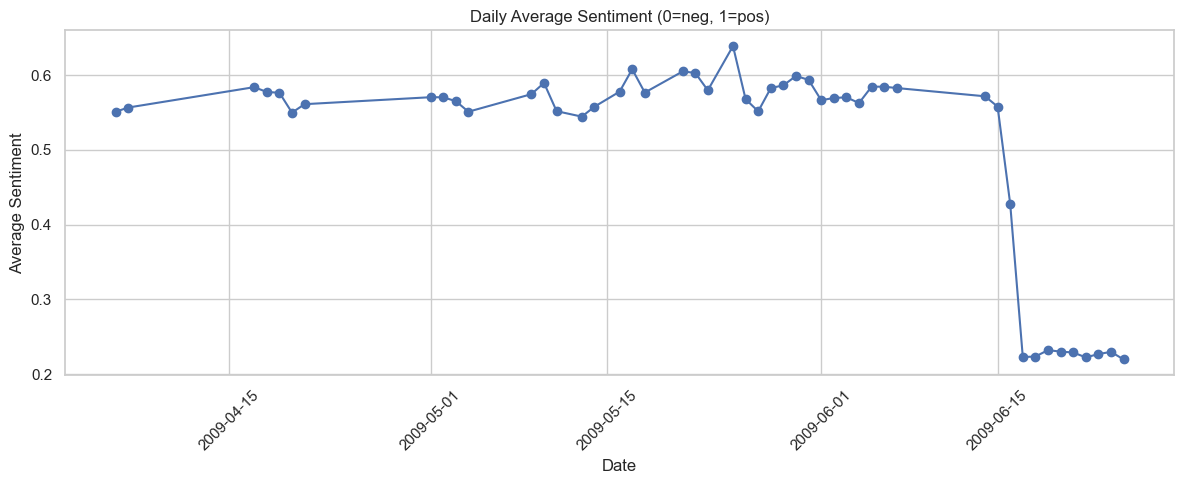

<Figure size 1200x500 with 0 Axes>

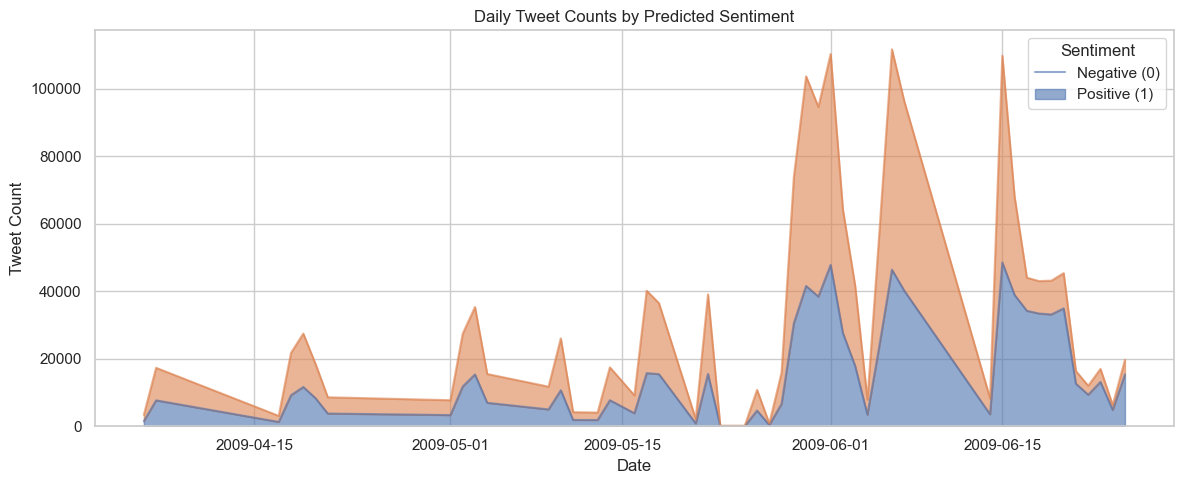

In [ ]:
data['date_only'] = pd.to_datetime(data['date']).dt.date

daily_avg = data.groupby('date_only')['predicted_sentiment'].mean()

daily_counts = data.groupby(['date_only', 'predicted_sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12,5))
daily_avg.plot(marker='o')
plt.title('Daily Average Sentiment (0=neg, 1=pos)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
daily_counts.plot(kind='area', stacked=True, figsize=(12,5), alpha=0.6)
plt.title('Daily Tweet Counts by Predicted Sentiment')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment', labels=['Negative (0)', 'Positive (1)'])
plt.tight_layout()
plt.show()


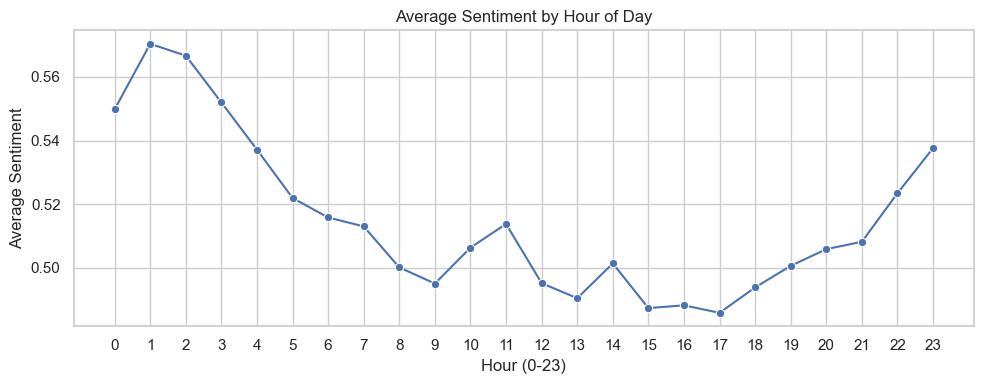

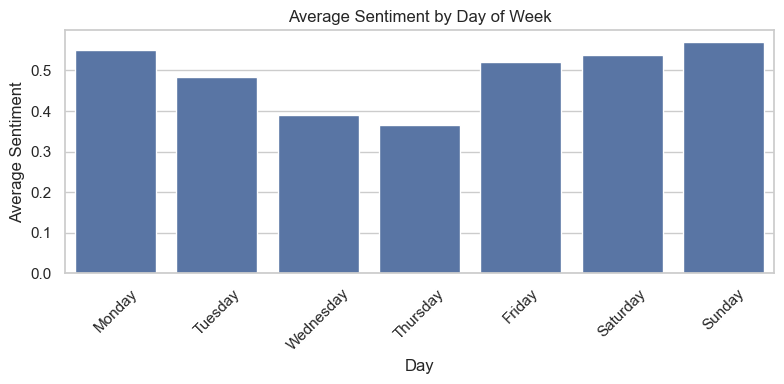

In [ ]:
dt = pd.to_datetime(data['date'])
data['hour'] = dt.dt.hour
data['dow'] = dt.dt.day_name()  

hourly = data.groupby('hour')['predicted_sentiment'].mean()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly.index, y=hourly.values, marker='o')
plt.title('Average Sentiment by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Sentiment')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_avg = data.groupby('dow')['predicted_sentiment'].mean().reindex(dow_order)

plt.figure(figsize=(8,4))
sns.barplot(x=dow_avg.index, y=dow_avg.values)
plt.title('Average Sentiment by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


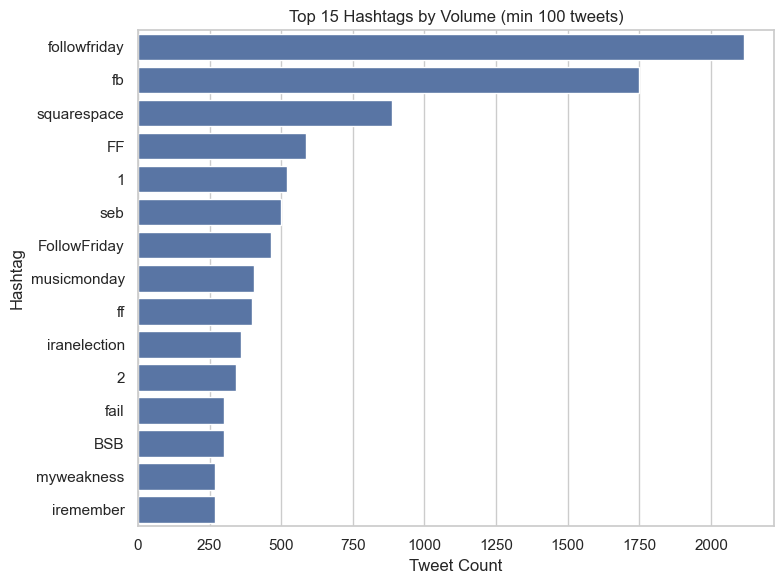

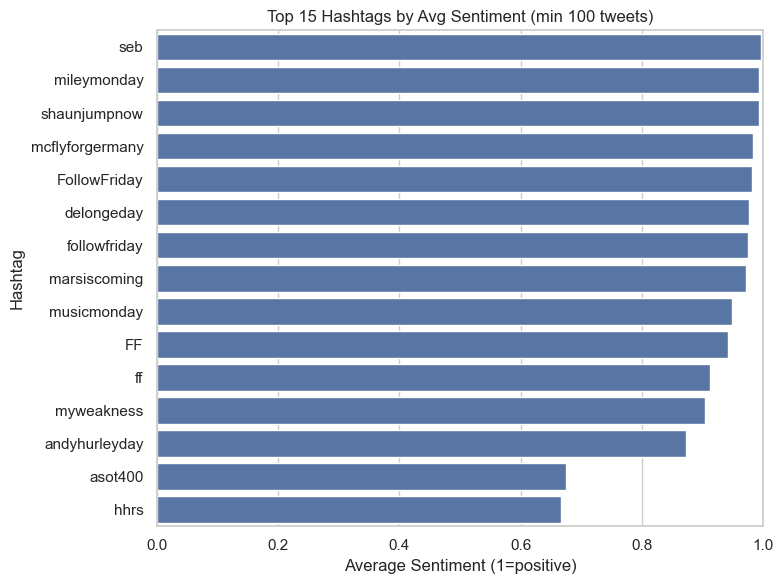

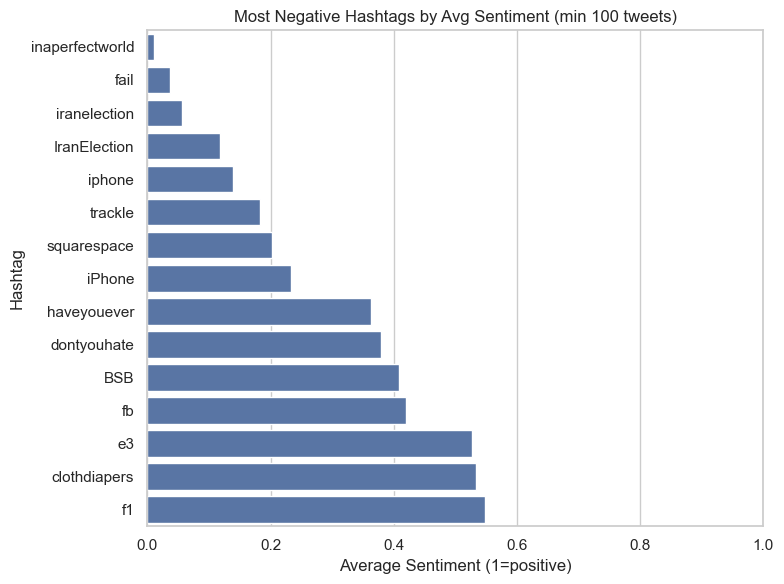

In [ ]:
def extract_hashtags(s):
    if not isinstance(s, str):
        return []
    return re.findall(r'#(\w+)', s)

data['hashtags'] = data['text'].astype(str).apply(extract_hashtags)

ht = data.explode('hashtags')
ht = ht.dropna(subset=['hashtags'])

hashtag_stats = ht.groupby('hashtags').agg(
    avg_sentiment=('predicted_sentiment', 'mean'),
    count=('predicted_sentiment', 'size')
).reset_index()

min_count = 100
top_ht = hashtag_stats[hashtag_stats['count'] >= min_count]

top_by_count = top_ht.sort_values('count', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(y='hashtags', x='count', data=top_by_count)
plt.title('Top 15 Hashtags by Volume (min {} tweets)'.format(min_count))
plt.xlabel('Tweet Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

top_by_sent = top_ht.sort_values('avg_sentiment', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(y='hashtags', x='avg_sentiment', data=top_by_sent)
plt.title('Top 15 Hashtags by Avg Sentiment (min {} tweets)'.format(min_count))
plt.xlabel('Average Sentiment (1=positive)')
plt.ylabel('Hashtag')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

neg_by_sent = top_ht.sort_values('avg_sentiment', ascending=True).head(15)
plt.figure(figsize=(8,6))
sns.barplot(y='hashtags', x='avg_sentiment', data=neg_by_sent)
plt.title('Most Negative Hashtags by Avg Sentiment (min {} tweets)'.format(min_count))
plt.xlabel('Average Sentiment (1=positive)')
plt.ylabel('Hashtag')
plt.xlim(0,1)
plt.tight_layout()
plt.show()
